# Traffic Camera: Unwarp image

In this notebook, you will learn how to easily unwarp images to get top-view!
The Unwarped image can be easier to analyze in some cases.

## Imports

We will start by importing a few libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Download 4K Traffic Cam Video

You will need **youtube-dl** to download the video. (You can ignore this step but still, you will need a video

In [2]:
!youtube-dl -f 313 MNn9qKG2UFI

[youtube] MNn9qKG2UFI: Downloading webpage
[youtube] MNn9qKG2UFI: Downloading video info webpage
[youtube] MNn9qKG2UFI: Extracting video information
[download] 4K Traffic camera video - free download now!-MNn9qKG2UFI.webm has already been downloaded
[download] 100% of 656.19MiB


## View first frame

We will use OpenCV and Matplotlib to view the very first frame:

In [3]:
cap = cv2.VideoCapture("4K Traffic camera video - free download now!-MNn9qKG2UFI.webm")
while(True):
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    break

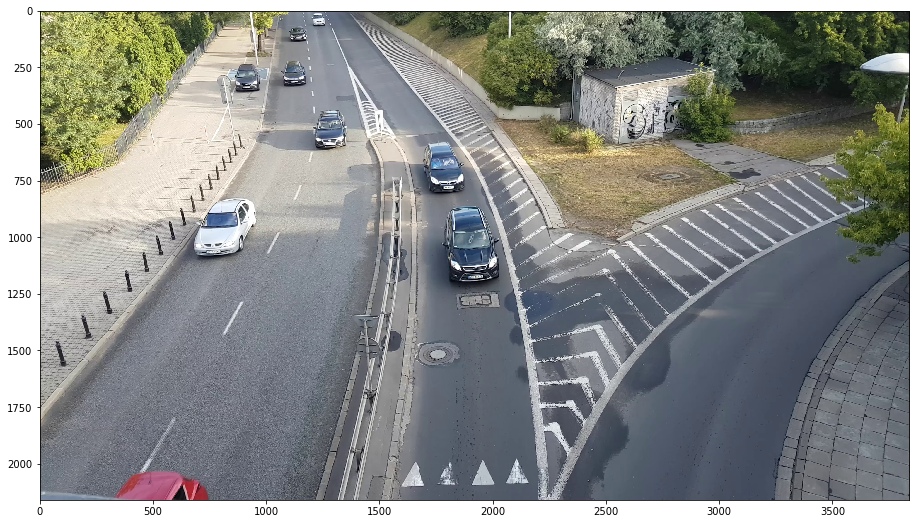

In [4]:
plt.figure(figsize=(16,9))
plt.imshow(frame)
plt.show()

## Define perspective with trapezoid

We will define a Region of Interest (ROI) by drawing a trapezoid on the image. The trapezoid should have two sides parallel to the straight segment of the road. In next step we will unwarp the image

Let's see the trapezoid!

In [5]:
roi_corners=[[0.0 *frame.shape[1],1.0*frame.shape[0]], # left, down
             [0.38*frame.shape[1],0.0*frame.shape[0]], # left, up
             [0.62*frame.shape[1],0.0*frame.shape[0]], # right, up
             [1.0 *frame.shape[1],1.0*frame.shape[0]]] # right, down

show_roi=True
if show_roi:
    #change the format of points list and draw it on image
    src = np.float32(roi_corners)
    pts = np.array(src, np.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(frame,[pts],True,(255,0,0),10) # Red in RGB; width: 10

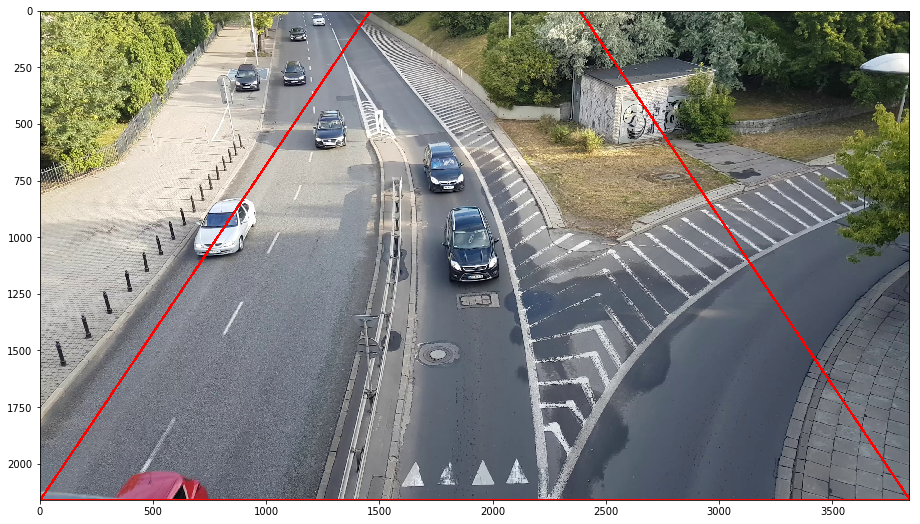

In [6]:
plt.figure(figsize=(16,9))
plt.imshow(frame)
plt.show()

## The Unwarp function

We will use 4 point perspective transformation to transform our trapezoid into a rectangle.

We need to define destination of our four points in unwarped image -> new points should create a rectangle.

In [7]:
def unwarp(img, roi_corners):
    '''
    Unwarp image using 4 points and getPerspectiveTransform
    '''
    src = np.float32(roi_corners)

    warped_size=(img.shape[1], img.shape[0])
    offset=int(warped_size[0]/3.0)
    dst = np.float32([[offset               , warped_size[1] ], #
                      [offset               , 0              ],
                      [warped_size[0]-offset, 0              ],
                      [warped_size[0]-offset, warped_size[1]]])

    Mpersp = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, Mpersp, dsize=warped_size)
    return warped

In [8]:
# Unwarp the frame!
unwarped = unwarp(frame,roi_corners)

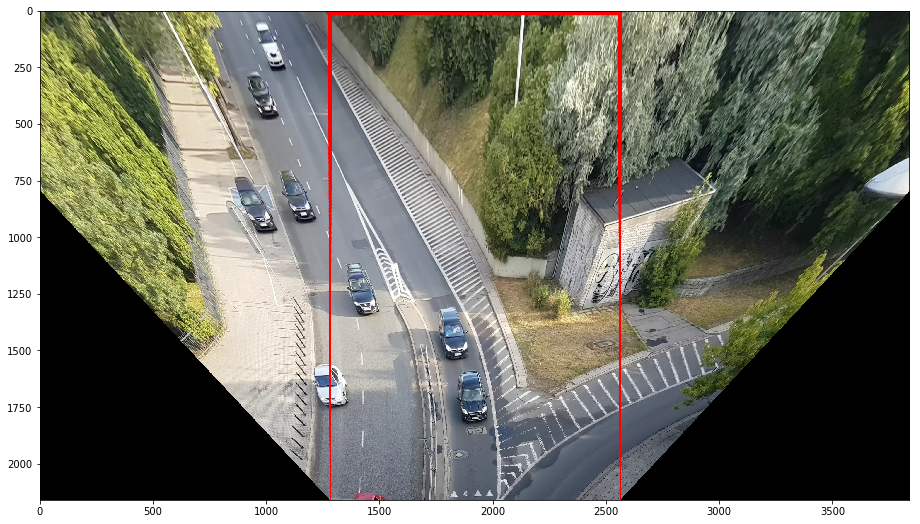

In [9]:
# Let's see the result
plt.figure(figsize=(16,9))
plt.imshow(unwarped)
plt.show()

## Unwarp all 9184 frames!

Ok, so we know how to unwarp one frame, let's try to do it for all the frames in this video!

In [10]:
cap = cv2.VideoCapture("4K Traffic camera video - free download now!-MNn9qKG2UFI.webm")
counter = 0
while(True):
    ret, frame = cap.read()
    if not ret:
        break
    
    # We are working in BGR which is native for OpenCV
    
    show_roi=True
    if show_roi:
        src = np.float32(roi_corners)

        pts = np.array(src, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(frame,[pts],True,(0,0,255),10) # Red in BGR

    # unwarp
    unwarped = unwarp(frame,roi_corners)
    
    #Picture in picture - show the original frame
    unwarped[-541:-1,0:960,:] = frame[::4,::4,:]
    
    #write the result to file!
    cv2.imwrite("/tmp/img%08d.jpg"%counter, unwarped)
    counter = counter + 1

## Create Video from files!

You will need **ffmpeg** to create a video from **.jpg** files

If you prefer H264 instead of H265 change libx265 to libx264. H265 will create smaller output file.

In [11]:
!ffmpeg -pattern_type glob -i '/tmp/img*.jpg' -c:v libx265 result.mp4

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

## Share Your Results!

Fork this repo and share your results!